Audio File Formats: 
- mp3
- flac
- wav

In [7]:
import wave

#Audio Signal Parameters
# - number of channels
# - sample width
# - framerate/sample-rate/sample-frequency
# - number of frames
# - Value of a frame

In [8]:
# Load a wav file and get its parameters and show them
obj = wave.open("audios/harvard.wav", "rb")
n_channels = obj.getnchannels()
sample_w = obj.getsampwidth()
frame_rate = obj.getframerate()
n_frames = obj.getnframes()
print("Number of Channels: ", n_channels)
print("Sample Width: ", sample_w)
print("Frame Rate: ", frame_rate)
print("Number of Frames: ", n_frames)

print("All Parameters: ", obj.getparams())

Number of Channels:  2
Sample Width:  2
Frame Rate:  44100
Number of Frames:  809508
All Parameters:  _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=809508, comptype='NONE', compname='not compressed')


In [9]:
# Getting lenght of the audio
t_audio = obj.getnframes() / obj.getframerate()
print("Time of audio file: ", t_audio)

# Getting frames of the audio file
frames = obj.readframes(-1) # -1 means all frames
print(type(frames), type(frames[0]))
print(len(frames))
print(len(frames) / obj.getsampwidth())

obj.close()

Time of audio file:  18.356190476190477
<class 'bytes'> <class 'int'>
3238032
1619016.0


In [10]:
# Copy the audio file as another wav file
obj_new = wave.open("audios/Sanaz.wav", "wb")
obj_new.setnchannels(n_channels)
obj_new.setsampwidth(sample_w)
obj_new.setframerate(frame_rate)

obj_new.writeframes(frames)
obj_new.close()

Exception ignored in: <function Wave_write.__del__ at 0x0000015347D785E0>
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\wave.py", line 447, in __del__
    self.close()
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\wave.py", line 565, in close
    self._ensure_header_written(0)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\wave.py", line 583, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified


t_audio:  18.356190476190477


ValueError: x and y must have same first dimension, but have shapes (809508,) and (1619016,)

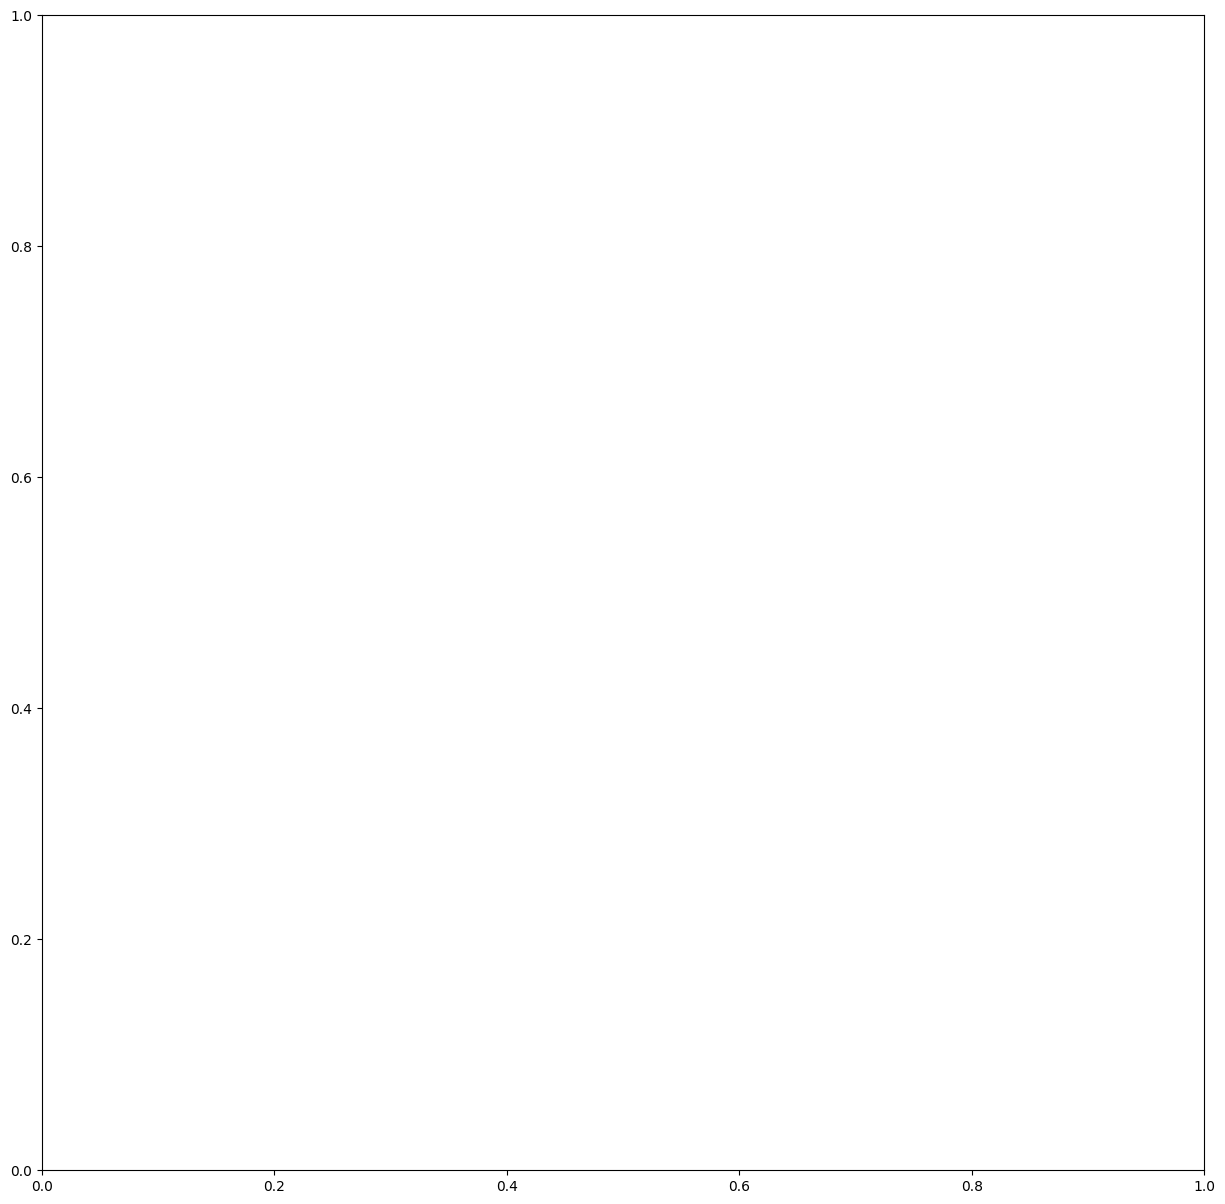

In [ ]:
# Plotting an audio file
import wave
import matplotlib.pyplot as plt
import numpy as np

obj = wave.open("audios/Sanaz.wav", "rb")
sample_frequency = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

obj.close()

t_audio = n_samples/sample_frequency
print("t_audio: ", t_audio)

# Create the plot
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

# If stereo, take only one channel
if n_channels == 2:
    signal_array = signal_array[::2]  # Take every other sample to get one channel



time = np.linspace(0, t_audio, num=n_samples)
plt.figure(figsize=(15, 15))
plt.plot(time, signal_array)
plt.title("Audio Signal")

plt.ylabel("Signal_wave")
plt.xlabel("Time (Soconds)")
plt.xlim(0, t_audio)
plt.show()
